# Отчет по лабораторной №1
## по курсу "Системы аналитических вычислений"

### группа: М8О-207Б-19
### студент: Воронов К.М.

# **Поворот квадрата**

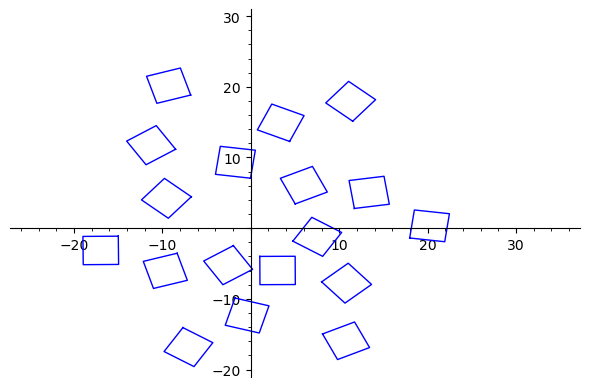

In [199]:
#Задаем квадрат, с помощью матриц поворота и смещения рисуем другие квадраты в цикле.
square = matrix([[1 ,1], [1, 5], [5, 5], [5, 1], [1, 1]])

alpha = 10
s = 2
newsquare = matrix()

mas = []

for i in range (18):
    rotation = matrix ([ [cos(alpha), sin(alpha)], [-sin(alpha), cos(alpha)] ])
    shift = matrix([[s,0],[s,0],[s,0],[s,0], [s, 0]])
    newsquare = square + shift
    newsquare = newsquare * rotation
    mas.append(newsquare)
    alpha += 1
    s += 1
    
lines =  line(mas[0])

for i in range (1,18):
    lines += line(mas[i])
    
show(lines, ymax = 30, xmax = 36, ymin = -20, xmin = -26)

# **Исследование функции**

In [200]:
y(x) = (x^3 - x^2 - x + 1)^(1/3) / tan(x)
show(y(x))

(x^3 - x^2 - x + 1)^(1/3)/tan(x)

### **Область определения**

In [201]:
solve(x^3 - x^2 - x + 1 >= 0, x)

[[x >= -1]]

Точки разрыва

In [202]:
asymptote = []
asymptote.append(find_root(tan(x), -1, 1))
find_root(tan(x), -1, 1)

0.0

In [203]:
find_root(tan(x), 1, 3.2)
asymptote.append(find_root(tan(x), 1, 3.2))
find_root(tan(x), 1, 3.2)

3.141592653589798

В точках х = pi/2 и 3pi/2 значение тангенса не существуют, а в 0 и pi равны нулю. Поэтому исключаем точки 1.570796326794899, 4.712388980384697, 0 и 3.141592653589798 для отрезка x = [-1;5]

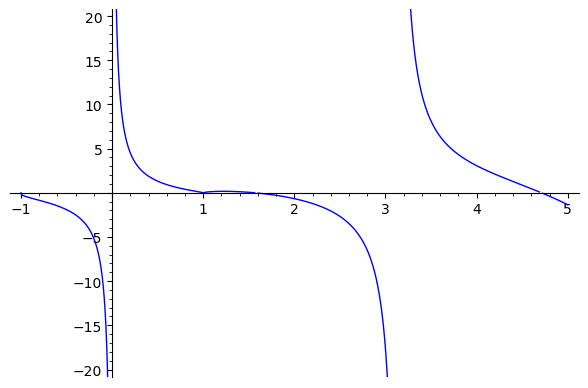

In [204]:
plot(y(x), ymax = 20, xmax = 5, ymin = -20, xmin = -1, exclude = [0,  3.141592653589798, 1.570796326794899, 4.712388980384697])

### **Чётность/нечётность функции**

Чётная функция удовлетворяет условию $f(x) = f(-x)$

In [205]:
g = y(x) - y(-x)
show("y(x) - y(-x) =")
show(g)

'y(x) - y(-x) ='

-(-x^3 - x^2 + x + 1)^(1/3)/tan(-x) + (x^3 - x^2 - x + 1)^(1/3)/tan(x)

Функция не является чётной

Нечётная функция удовлетворяет условию $f(x) = -f(-x)$

In [206]:
g = y(x) + y(-x)
show("y(x) + y(-x) =")
show(g)

'y(x) + y(-x) ='

(-x^3 - x^2 + x + 1)^(1/3)/tan(-x) + (x^3 - x^2 - x + 1)^(1/3)/tan(x)

Функция не является нечётной

### **Периодичность функции**

Функция $f(x)$ называется переодической, если для любого $x$ существует $T\neq0$, такое что $f(x-T)=f(x)=f(x+T)$

In [207]:
var("T")
g = y(x) - y(x + T)
solve(g, T)

[tan(T + x) == (T^3 + (3*T - 1)*x^2 + x^3 - T^2 + (3*T^2 - 2*T - 1)*x - T + 1)^(1/3)*tan(x)/(x^3 - x^2 - x + 1)^(1/3)]

Функция не является периодичной. Она трансцедентна(также можно опровергнуть периодичность тем, что она ограничена по х).

### **Точки пересечения графика с осями координат**

С осью X

In [208]:
#Находим корни уравнения y(x) = 0
mas = []

sls = solve(y(x) == 0,x)
for i in range (len(sls)):
    mas.append(float(sls[i].rhs()))
    show(html(f"$x_{i} = {mas[i]}"))

<script type="math/tex">x_0 = -1.0</script>

<script type="math/tex">x_1 = 1.0</script>

С осью Y

Так как тангенс от нуля равен нулю, и он находится в знаменателе у функции, то пересечения с осью Y нет.

### **Промежутки знакопостоянства**

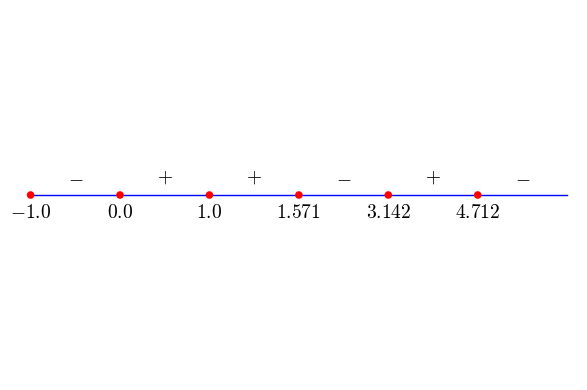

In [209]:
x1 = find_root(y(x), 1.1, 2.5)
mas.append(x1)
x2 = find_root(y(x), 4.1, 5)
mas.append(x2)

#Точки
mas = mas + asymptote
mas = sorted(mas)

#Линия
intervals_of_constancy = plot(0, xmin=0, xmax=6, ymin=-0.5, ymax=0.5)

change = 0

#Рисовка точек со значениями
for i in range(len(mas)):
    intervals_of_constancy  += point((change, 0), color="red", size=30, zorder=10)
    intervals_of_constancy  += text("$" + str(round(mas[i], 3)) + "$", (change, -0.05), color="black", fontsize=14)
    change += 1

change = 0.5

#Расстановка знаков
eps = 0.1
for i in range(len(mas)):
    if (y(mas[i]+eps) > 0):
          intervals_of_constancy  += text("$+$", (change, 0.05), color="black", fontsize=14)
    else:
        intervals_of_constancy  += text("$-$", (change, 0.05), color="black", fontsize=14)
    change += 1
    
    
intervals_of_constancy.show(axes=False)


### **Промежутки возрастания и убывания**

Производная функции и её график

In [210]:
diff(x) = derivative(y(x))
show(diff(x))

-(x^3 - x^2 - x + 1)^(1/3)*(tan(x)^2 + 1)/tan(x)^2 + 1/3*(3*x^2 - 2*x - 1)/((x^3 - x^2 - x + 1)^(2/3)*tan(x))

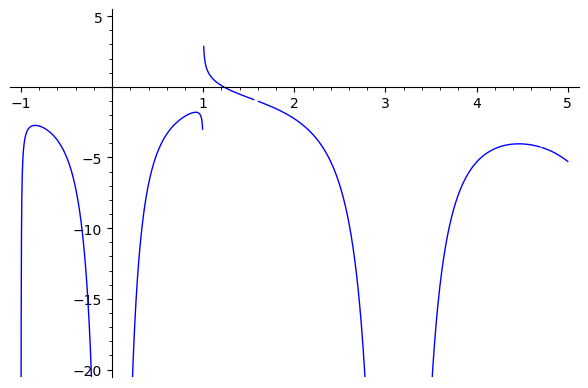

In [211]:
plot(diff(x), ymax = 5, xmax = 5, ymin = -20, xmin = -1, exclude = [1, 0,  3.141592653589798, 1.570796326794899, 4.712388980384697])

In [212]:
#Предполагаемые точки экстремума, производная равна 0
ext = []

x1 = find_root(diff(x), 1.05, 1.5)
ext.append(x1)
show(html(f"$x_{1} = {x1}"))

<script type="math/tex">x_1 = 1.2238883277473316</script>

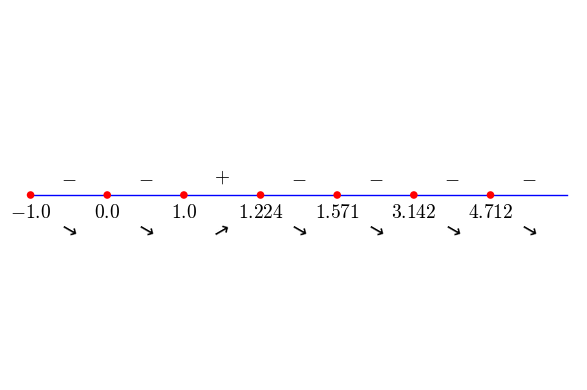

In [213]:
#Точки
mas = mas + ext
mas = sorted(mas)

#Линия
intervals_of_constancy = plot(0, xmin=0, xmax=7, ymin=-0.5, ymax=0.5)

change = 0

#Рисовка точек со значениями
for i in range(len(mas)):
    intervals_of_constancy  += point((change, 0), color="red", size=30, zorder=10)
    intervals_of_constancy  += text("$" + str(round(mas[i], 3)) + "$", (change, -0.05), color="black", fontsize=14)
    change += 1

change = 0.5

#Расстановка знаков и стрелочек
eps = 0.1
for i in range(len(mas)):
    if (diff(mas[i]+eps) > 0):
        intervals_of_constancy += text("→", (change , -0.1), rotation = 30, color="black", fontsize=14)
        intervals_of_constancy  += text("$+$", (change, 0.05), color="black", fontsize=14)
    else:
        intervals_of_constancy += text("→", (change , -0.1), rotation = -30, color="black", fontsize=14)
        intervals_of_constancy  += text("$-$", (change, 0.05), color="black", fontsize=14)
    change += 1
    
    
intervals_of_constancy.show(axes=False)


### **Точки экстремума и значения в этих точках**

График первой производной

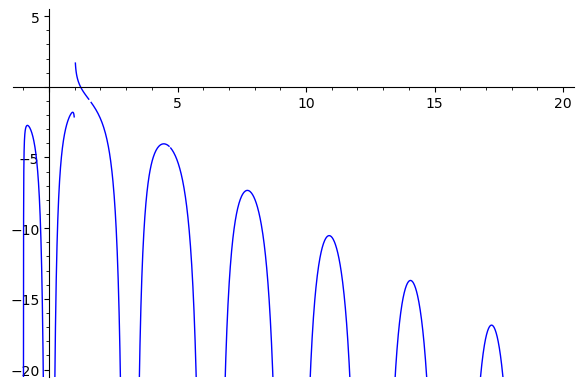

In [214]:
plot(diff(x), ymax = 5, xmax = 20, ymin = -20, xmin = -1, exclude = [1, 0,  3.141592653589798, 1.570796326794899, 4.712388980384697])

График второй производной

In [215]:
diff2(x) = derivative(diff(x))
show(diff2(x))

-2*(x^3 - x^2 - x + 1)^(1/3)*(tan(x)^2 + 1)/tan(x) + 2*(x^3 - x^2 - x + 1)^(1/3)*(tan(x)^2 + 1)^2/tan(x)^3 - 2/3*(3*x^2 - 2*x - 1)*(tan(x)^2 + 1)/((x^3 - x^2 - x + 1)^(2/3)*tan(x)^2) - 2/9*(3*x^2 - 2*x - 1)^2/((x^3 - x^2 - x + 1)^(5/3)*tan(x)) + 2/3*(3*x - 1)/((x^3 - x^2 - x + 1)^(2/3)*tan(x))

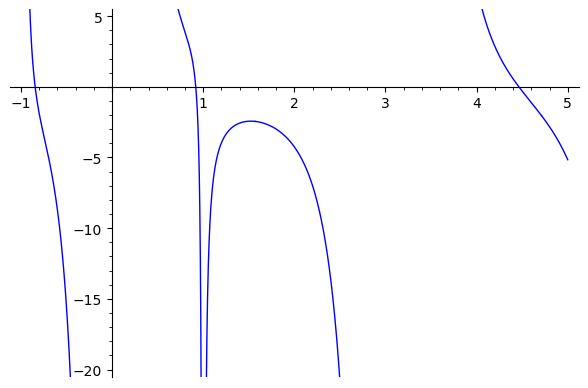

In [216]:
plot(diff2(x), ymax = 5, xmax = 5, ymin = -20, xmin = -1, exclude = [1, 0,  3.141592653589798, 1.570796326794899, 4.712388980384697])

In [217]:
if (diff2(ext[0]) > 0):
    show(html(f"$x_{1} = {x1}$ - локальный минимум"))
if (diff2(ext[0]) < 0):
    show(html(f"$x_{1} = {round(x1, 3)}$ - локальный максимум"))

<script type="math/tex">x_1 = 1.224</script> - локальный максимум

### **Непрерывность. Наличие точек разрыва и их классификация**

In [218]:
nulls = asymptote
nulls[1] = pi
nulls.append(pi/2)
nulls.append(3*pi/2)

for i in range(len(nulls)): 
    lim_left = lim(y(x), x = nulls[i], dir = 'left')
    lim_right = lim(y(x), x = nulls[i], dir = 'right')
    if (lim_left == lim_right and abs(lim_left) != oo and abs(lim_right) != oo):
        show(html(f"$x_{i} = {nulls[i]}$ - разрыв первого рода"))
    else:
        show(html(f"$x_{i} = {nulls[i]}$ - разрыв второго рода"))

<script type="math/tex">x_0 = 0.0</script> - разрыв второго рода

<script type="math/tex">x_1 = pi</script> - разрыв второго рода

<script type="math/tex">x_2 = 1/2*pi</script> - разрыв первого рода

<script type="math/tex">x_3 = 3/2*pi</script> - разрыв первого рода

### **Асимптоты**

In [219]:
lim_inf_right = lim(y, x = +oo)
show(LatexExpr(r'\lim_{x \to +\infty} y(x) = ') + str(lim_inf_right.simplify_full()))

\lim_{x \to +\infty} y(x) = und

In [220]:
lim_inf_left = lim(y, x = -oo)
show(LatexExpr(r'\lim_{x \to -\infty} y(x) = ') + str(lim_inf_left.simplify_full()))

\lim_{x \to -\infty} y(x) = und

Асимптоты только в точках разрыва

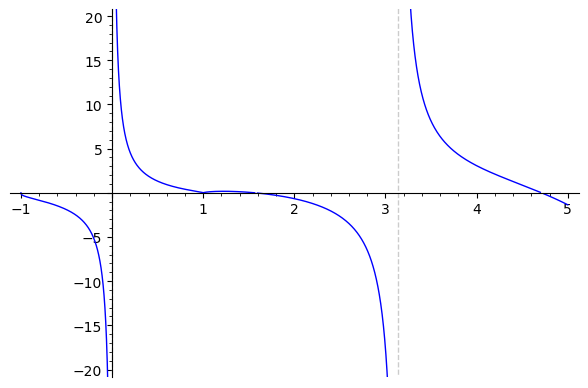

In [221]:
plot(y(x), ymax = 20, xmax = 5, ymin = -20, xmin = -1, exclude = [0,  3.141592653589798, 1.570796326794899, 4.712388980384697], detect_poles = "show")